In [1]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
import os
print("Files uploaded:", os.listdir())

Saving student-mat - student-mat.csv (1).csv to student-mat - student-mat.csv (1).csv
Files uploaded: ['.config', 'student-mat - student-mat.csv (1).csv', 'sample_data']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

/tmp/ipython-input-944864229.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


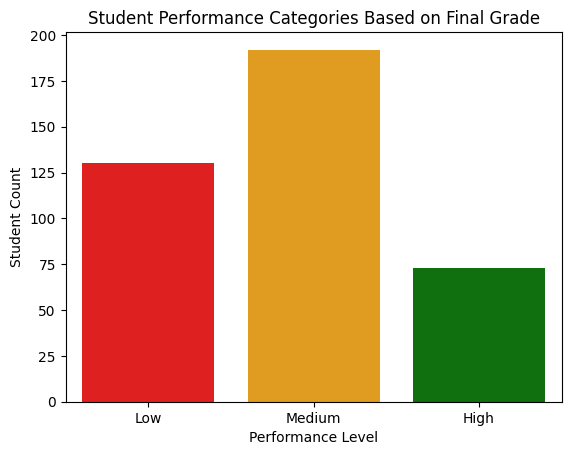

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("student-mat - student-mat.csv (1).csv")
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.columns
df["Result"] = df["G3"].apply(lambda x: "Pass" if x >= 10 else "Fail")
df[["G3", "Result"]].head()
X = df.drop(["G3", "Result"], axis=1)
y = df["Result"]
X = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
def score_category(score):
    if score < 10:
        return "Low"
    elif score < 15:
        return "Medium"
    else:
        return "High"

df["Score_Level"] = df["G3"].apply(score_category)
df[["G3", "Score_Level"]].head()
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(
    x="Score_Level",
    data=df,
    order=["Low", "Medium", "High"],
    palette=["red", "orange", "green"]
)

plt.title("Student Performance Categories Based on Final Grade")
plt.xlabel("Performance Level")
plt.ylabel("Student Count")
plt.show()



